In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
# torch.manual_seed(17)

# class HaS(object): 
# #     def __init__(self):
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         # possible grid size, 0 means no hiding
#         grid_size=3

#         # hiding probability
#         hide_prob = 0.1
 
#         # randomly choose one grid size
# #         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

#         # hide the patches
#         if(grid_size>0):
#              for x in range(0,wd,grid_size):
#                  for y in range(0,ht,grid_size):
#                      x_end = min(wd, x+grid_size)  
#                      y_end = min(ht, y+grid_size)
#                      if(random.random() <=  hide_prob):
#                            img_[x:x_end,y:y_end,:]=0

#         return img_
    
# torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std

def load_data(is_train,aug,batch_size):
  dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
#   mean, std = get_mean_and_std(dataset)
#   print(mean, std)
  dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
  return dataloader

batch_size = 256 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6
[[[-0.9147032  -0.38956204  0.0274618  ...  0.01201648  0.18191507
    0.15102442]
  [-0.32778072 -0.03431951  0.10468844 ... -0.21966343  0.1973604
    0.2591417 ]
  [-0.09610081  0.29003236  0.24369638 ... -0.6366873  -0.51312464
   -0.32778072]
  ...
  [ 1.0931895   1.2321974   1.448432   ...  0.22825105  0.66072035
    1.6646665 ]
  [ 1.2013068   1.3248694   1.3866507  ... -0.38956204 -0.17332745
    1.1704161 ]
  [ 1.3866507   1.2785335   1.1549708  ... -0.8529219  -0.8065859
    0.7997283 ]]

 [[-1.2393323  -0.8772444  -0.53089947 ... -0.5151565  -0.3419841
   -0.3419841 ]
  [-0.8142726  -0.6725861  -0.5623854  ... -0.68832904 -0.32624117
   -0.29475525]
  [-0.6411001  -0.42069885 -0.45218474 ... -1.003188   -0.9244732
   -0.76704377]
  ...
  [ 0.57110703  0.6813077   0.9804237  ... -0.21604052  0.19327614
    1.2323109 ]
  [ 0.6025929   0.74427944  0.8229942  ... -0.83001554 -0.68832904
    0.6655647 ]
  [ 0.87022305  0.8072512   0.6340788  ... -1.12913

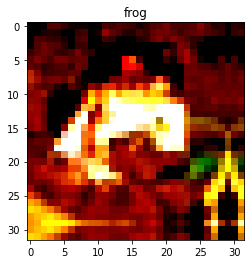

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
image_= np.array(image).copy()
print(image.shape, label)
print(image_)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
# trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=batch_size,shuffle=True)
# testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,shuffle=False)

# images, labels = iter(trainDataLoader).next()
# plt.figure(figsize=(17,8))
# for index in np.arange(0,5):
#   plt.subplot(1,5,index+1)
#   plt.imshow(images[index].numpy().transpose(1,2,0))
#   plt.title(str(classes[labels[index]]))

def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std


In [8]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, in_planes, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = in_planes

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, in_planes, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, in_planes*2, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, in_planes*4, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, in_planes*8, num_blocks[3], stride=2)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, self.in_planes*8, num_blocks[3], stride=2)
        self.linear = nn.Linear(320, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 8)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out

    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
#     return ResNet(BasicBlock, [2, 2, 2])
    return ResNet(80, BasicBlock, [3, 3, 2])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4914330


In [10]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [11]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
num_epochs = 5000 # param
epoch_start = 0
# path = 'adam_rotate_center_crop1.pt'
# path = 'block_3.pt'
path = 'lr_0.1-0.0003_decay_channel_80_avg_8.pt'

train_loss_history = []
test_loss_history = []
test_accuracy_history = []
train_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()
lr = 0.1 # param
lr_min=0.0003
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4) # changable optimizer
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9) # changable optimizer
# optimizer = torch.optim.Adam(model1.parameters(),lr=lr, betas=(0.9,0.999), eps=1e-08, amsgrad=False) # changable optimizer
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)

# torch.cuda.empty_cache()

if os.path.exists(path):
  checkpoint = torch.load(path)
  print('Read model from checkpoint')
  model1.cuda().load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch_start = checkpoint['epoch']
  Loss = checkpoint['Loss']
  train_loss_history = checkpoint['train_loss_history']
  test_loss_history = checkpoint['test_loss_history']
  test_accuracy_history = checkpoint['test_accuracy_history']
  train_accuracy_history = checkpoint['train_accuracy_history']
  print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs + 1):
  timestart = time.time()

  train_loss = 0.0
  test_loss = 0.0
  test_accuracy = 0.0
  train_accuracy = 0.0

  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model1.cuda()(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
    optimizer.step()
    train_loss += fit.item()
    train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model1.cuda()(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
      test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  test_accu = test_accuracy/len(testDataLoader)
  train_accu = train_accuracy/len(trainDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  test_accuracy_history.append(test_accu)
  train_accuracy_history.append(train_accu)
  print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))
  
  if epoch % 5 == 0 and epoch != 0:
    torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'test_accuracy_history':test_accuracy_history,
          'train_accuracy_history':train_accuracy_history},path)
    print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 395
Epoch 396, Train loss 2.5001605256803413e-05, Test loss 0.4069094069302082, Train accuracy 100.0, Test accuracy 94.189453125, Cost 61.951008796691895 s
Epoch 397, Train loss 1.6471225050297888e-05, Test loss 0.4075302477926016, Train accuracy 100.0, Test accuracy 94.19921875, Cost 61.899245262145996 s
Epoch 398, Train loss 2.4953838484279634e-05, Test loss 0.40766853727400304, Train accuracy 100.0, Test accuracy 94.208984375, Cost 61.88175368309021 s
Epoch 399, Train loss 2.41791375369688e-05, Test loss 0.40913010500371455, Train accuracy 100.0, Test accuracy 94.140625, Cost 61.88531541824341 s
Epoch 400, Train loss 2.7122882836952806e-05, Test loss 0.40931070148944854, Train accuracy 100.0, Test accuracy 94.16015625, Cost 62.08302855491638 s
Model saved in epoch 400
Epoch 401, Train loss 2.1001798600360528e-05, Test loss 0.4089284248650074, Train accuracy 100.0, Test accuracy 94.130859375, Cost 62.10115361213684 s
Epoch 402, Train loss

Epoch 449, Train loss 2.436673052493322e-05, Test loss 0.43216184973716737, Train accuracy 100.0, Test accuracy 93.896484375, Cost 61.92343020439148 s
Epoch 450, Train loss 1.8779277179036472e-05, Test loss 0.42642318196594714, Train accuracy 100.0, Test accuracy 93.876953125, Cost 62.07629728317261 s
Model saved in epoch 450
Epoch 451, Train loss 1.9460581412057442e-05, Test loss 0.42335310727357867, Train accuracy 100.0, Test accuracy 93.80859375, Cost 62.15950393676758 s
Epoch 452, Train loss 1.4783238237586194e-05, Test loss 0.422449854016304, Train accuracy 100.0, Test accuracy 93.798828125, Cost 62.18683195114136 s
Epoch 453, Train loss 1.3186509953300174e-05, Test loss 0.4219543967396021, Train accuracy 100.0, Test accuracy 93.798828125, Cost 62.195961236953735 s
Epoch 454, Train loss 1.4996576409313251e-05, Test loss 0.4221533454954624, Train accuracy 100.0, Test accuracy 93.76953125, Cost 62.45021629333496 s
Epoch 455, Train loss 1.6393716526979507e-05, Test loss 0.42217609658

Epoch 502, Train loss 8.750232658177984e-06, Test loss 0.4143998999148607, Train accuracy 100.0, Test accuracy 93.955078125, Cost 62.19379115104675 s
Epoch 503, Train loss 1.2887080320139403e-05, Test loss 0.4134718727320433, Train accuracy 100.0, Test accuracy 93.955078125, Cost 61.88779807090759 s
Epoch 504, Train loss 8.336438769192125e-06, Test loss 0.41339488737285135, Train accuracy 100.0, Test accuracy 93.955078125, Cost 61.90096735954285 s
Epoch 505, Train loss 7.754830466593858e-06, Test loss 0.4136297222226858, Train accuracy 100.0, Test accuracy 94.091796875, Cost 61.871158838272095 s
Model saved in epoch 505
Epoch 506, Train loss 9.800553287704485e-06, Test loss 0.41391642540693285, Train accuracy 100.0, Test accuracy 94.130859375, Cost 61.88169980049133 s
Epoch 507, Train loss 1.411327129873445e-05, Test loss 0.41403722316026687, Train accuracy 100.0, Test accuracy 93.96484375, Cost 61.85537838935852 s
Epoch 508, Train loss 1.043351064755389e-05, Test loss 0.41382531151175

Epoch 556, Train loss 8.579181405995155e-06, Test loss 0.4235896483063698, Train accuracy 100.0, Test accuracy 94.091796875, Cost 61.89235544204712 s
Epoch 557, Train loss 8.078543937534269e-06, Test loss 0.422715437784791, Train accuracy 100.0, Test accuracy 94.111328125, Cost 61.878750801086426 s
Epoch 558, Train loss 8.365816704559963e-06, Test loss 0.42231237441301345, Train accuracy 100.0, Test accuracy 94.1015625, Cost 61.86049509048462 s
Epoch 559, Train loss 7.11516918809069e-06, Test loss 0.4220379631966352, Train accuracy 100.0, Test accuracy 94.08203125, Cost 61.848304748535156 s
Epoch 560, Train loss 6.679785712569068e-06, Test loss 0.4220127783715725, Train accuracy 100.0, Test accuracy 94.08203125, Cost 61.843857526779175 s
Model saved in epoch 560
Epoch 561, Train loss 9.43145029307799e-06, Test loss 0.4215919688344002, Train accuracy 100.0, Test accuracy 94.091796875, Cost 61.99170637130737 s
Epoch 562, Train loss 6.8696266696731205e-06, Test loss 0.42150162123143675, T

Epoch 610, Train loss 6.140778700665458e-06, Test loss 0.42485199831426146, Train accuracy 100.0, Test accuracy 94.169921875, Cost 62.12612462043762 s
Model saved in epoch 610
Epoch 611, Train loss 5.419347770577346e-06, Test loss 0.4251440417021513, Train accuracy 100.0, Test accuracy 94.16015625, Cost 62.13169240951538 s
Epoch 612, Train loss 6.913918172963511e-06, Test loss 0.4252386841922998, Train accuracy 100.0, Test accuracy 94.169921875, Cost 62.13010215759277 s
Epoch 613, Train loss 6.707448370801159e-06, Test loss 0.4255478423088789, Train accuracy 100.0, Test accuracy 94.169921875, Cost 62.189709186553955 s
Epoch 614, Train loss 6.241575546655486e-06, Test loss 0.4256771828979254, Train accuracy 100.0, Test accuracy 94.19921875, Cost 62.11050820350647 s
Epoch 615, Train loss 7.824931803755283e-06, Test loss 0.4251671351492405, Train accuracy 100.0, Test accuracy 94.228515625, Cost 62.28470754623413 s
Model saved in epoch 615
Epoch 616, Train loss 5.727905396938416e-06, Test 

Epoch 663, Train loss 6.488785658700867e-06, Test loss 0.42487240545451643, Train accuracy 100.0, Test accuracy 94.21875, Cost 62.11779046058655 s
Epoch 664, Train loss 4.422637064227292e-06, Test loss 0.42489696815609934, Train accuracy 100.0, Test accuracy 94.208984375, Cost 62.14357829093933 s
Epoch 665, Train loss 5.82434741524631e-06, Test loss 0.42455468140542507, Train accuracy 100.0, Test accuracy 94.228515625, Cost 62.08377122879028 s
Model saved in epoch 665
Epoch 666, Train loss 7.4349475998047865e-06, Test loss 0.4248833078891039, Train accuracy 100.0, Test accuracy 94.19921875, Cost 62.16641354560852 s
Epoch 667, Train loss 5.289859030411588e-06, Test loss 0.4253451727330685, Train accuracy 100.0, Test accuracy 94.208984375, Cost 62.14622449874878 s
Epoch 668, Train loss 6.1504773185561135e-06, Test loss 0.4252291515469551, Train accuracy 100.0, Test accuracy 94.189453125, Cost 62.20269966125488 s
Epoch 669, Train loss 8.522053822243184e-06, Test loss 0.42510818466544154, 

Epoch 716, Train loss 7.059415920147265e-06, Test loss 0.42734625078737737, Train accuracy 100.0, Test accuracy 94.150390625, Cost 62.129626750946045 s
Epoch 717, Train loss 4.992501858854509e-06, Test loss 0.4277444452047348, Train accuracy 100.0, Test accuracy 94.150390625, Cost 62.14120697975159 s
Epoch 718, Train loss 4.6277179610361065e-06, Test loss 0.4275710079818964, Train accuracy 100.0, Test accuracy 94.150390625, Cost 62.1160204410553 s
Epoch 719, Train loss 6.216927255845734e-06, Test loss 0.42777502052485944, Train accuracy 100.0, Test accuracy 94.140625, Cost 62.100043296813965 s
Epoch 720, Train loss 5.786042916118193e-06, Test loss 0.42760139517486095, Train accuracy 100.0, Test accuracy 94.12109375, Cost 62.06068825721741 s
Model saved in epoch 720
Epoch 721, Train loss 4.8807302951675e-06, Test loss 0.42752027586102487, Train accuracy 100.0, Test accuracy 94.111328125, Cost 61.99444532394409 s
Epoch 722, Train loss 6.552174684611253e-06, Test loss 0.427721244096756, T

Epoch 770, Train loss 5.117448334224681e-06, Test loss 0.43038015365600585, Train accuracy 100.0, Test accuracy 94.169921875, Cost 62.128106355667114 s
Model saved in epoch 770
Epoch 771, Train loss 4.831691695954407e-06, Test loss 0.43044403195381165, Train accuracy 100.0, Test accuracy 94.169921875, Cost 62.12489366531372 s
Epoch 772, Train loss 4.7586448656556036e-06, Test loss 0.43055941350758076, Train accuracy 100.0, Test accuracy 94.150390625, Cost 62.09219193458557 s
Epoch 773, Train loss 6.134575488426797e-06, Test loss 0.43072775304317473, Train accuracy 100.0, Test accuracy 94.130859375, Cost 62.08165168762207 s
Epoch 774, Train loss 5.6516472987621514e-06, Test loss 0.43062424920499326, Train accuracy 100.0, Test accuracy 94.169921875, Cost 62.116551637649536 s
Epoch 775, Train loss 5.184074587401363e-06, Test loss 0.43064548783004286, Train accuracy 100.0, Test accuracy 94.1796875, Cost 62.15134310722351 s
Model saved in epoch 775
Epoch 776, Train loss 4.906188038944492e-0

Epoch 823, Train loss 5.539190270220198e-06, Test loss 0.43376918509602547, Train accuracy 100.0, Test accuracy 94.111328125, Cost 61.02980041503906 s
Epoch 824, Train loss 7.2893627486733954e-06, Test loss 0.4338500939309597, Train accuracy 100.0, Test accuracy 94.12109375, Cost 61.13538932800293 s
Epoch 825, Train loss 4.433441817419217e-06, Test loss 0.43407711386680603, Train accuracy 100.0, Test accuracy 94.111328125, Cost 61.07203197479248 s
Model saved in epoch 825
Epoch 826, Train loss 1.0090079045884364e-05, Test loss 0.4337244968861341, Train accuracy 100.0, Test accuracy 94.150390625, Cost 61.1551308631897 s
Epoch 827, Train loss 1.073028425870009e-05, Test loss 0.4364074531942606, Train accuracy 100.0, Test accuracy 94.140625, Cost 61.65141272544861 s
Epoch 828, Train loss 4.533337807239539e-06, Test loss 0.43622674122452737, Train accuracy 100.0, Test accuracy 94.140625, Cost 61.59669852256775 s
Epoch 829, Train loss 8.96575690678465e-06, Test loss 0.4359605647623539, Trai

Epoch 875, Train loss 0.0034791707736187573, Test loss 0.4457151424139738, Train accuracy 99.8959661989796, Test accuracy 92.6953125, Cost 61.74311971664429 s
Model saved in epoch 875
Epoch 876, Train loss 0.003926369035794704, Test loss 0.4126616630703211, Train accuracy 99.87603635204081, Test accuracy 93.037109375, Cost 61.81883239746094 s
Epoch 877, Train loss 0.003290567203795054, Test loss 0.4215470362454653, Train accuracy 99.89198022959184, Test accuracy 93.14453125, Cost 61.78453850746155 s
Epoch 878, Train loss 0.0026986482625572386, Test loss 0.42355023212730886, Train accuracy 99.90632971938776, Test accuracy 93.28125, Cost 61.789676904678345 s
Epoch 879, Train loss 0.001680433276036712, Test loss 0.431026803702116, Train accuracy 99.95216836734694, Test accuracy 93.203125, Cost 61.76526236534119 s
Epoch 880, Train loss 0.002919888609577189, Test loss 0.4477574624121189, Train accuracy 99.90433673469387, Test accuracy 93.056640625, Cost 61.74298810958862 s
Model saved in ep

Epoch 925, Train loss 0.005293697361278701, Test loss 0.4785851400345564, Train accuracy 99.80867346938776, Test accuracy 92.666015625, Cost 61.739810943603516 s
Model saved in epoch 925
Epoch 926, Train loss 0.005265621251575274, Test loss 0.48184472844004633, Train accuracy 99.81465242346938, Test accuracy 92.626953125, Cost 61.710102796554565 s
Epoch 927, Train loss 0.0037308200646887653, Test loss 0.4378505893051624, Train accuracy 99.89437181122449, Test accuracy 93.076171875, Cost 61.670817613601685 s
Epoch 928, Train loss 0.0026396907959846134, Test loss 0.44719945155084134, Train accuracy 99.90234375, Test accuracy 92.998046875, Cost 61.725303411483765 s
Epoch 929, Train loss 0.0037279408168206848, Test loss 0.44148302897810937, Train accuracy 99.88639987244898, Test accuracy 93.017578125, Cost 61.67959952354431 s
Epoch 930, Train loss 0.002496117956348937, Test loss 0.4573473583906889, Train accuracy 99.91629464285714, Test accuracy 92.802734375, Cost 61.73923063278198 s
Model

Epoch 975, Train loss 0.0003170601285138237, Test loss 0.44607062488794325, Train accuracy 99.99402104591837, Test accuracy 93.603515625, Cost 61.78898620605469 s
Model saved in epoch 975
Epoch 976, Train loss 0.00028620493822888084, Test loss 0.4337254326790571, Train accuracy 99.99202806122449, Test accuracy 93.57421875, Cost 61.77198052406311 s
Epoch 977, Train loss 0.0015752936245017012, Test loss 0.4707080975174904, Train accuracy 99.9461894132653, Test accuracy 93.369140625, Cost 61.72491192817688 s
Epoch 978, Train loss 0.0010809005952978623, Test loss 0.4602498099207878, Train accuracy 99.96811224489795, Test accuracy 93.3203125, Cost 61.71686410903931 s
Epoch 979, Train loss 0.0006711789905498985, Test loss 0.458647757396102, Train accuracy 99.98007015306122, Test accuracy 93.603515625, Cost 61.81921982765198 s
Epoch 980, Train loss 0.0013626513981395817, Test loss 0.4486233711242676, Train accuracy 99.96014030612245, Test accuracy 93.53515625, Cost 61.74045968055725 s
Model s

Epoch 1025, Train loss 0.0010071074400550097, Test loss 0.42698721773922443, Train accuracy 99.96412627551021, Test accuracy 93.37890625, Cost 61.33443784713745 s
Model saved in epoch 1025
Epoch 1026, Train loss 0.0008329489882345691, Test loss 0.42474738545715807, Train accuracy 99.97209821428571, Test accuracy 93.73046875, Cost 61.285597801208496 s
Epoch 1027, Train loss 0.0010396379815382048, Test loss 0.433287338539958, Train accuracy 99.96771364795919, Test accuracy 93.49609375, Cost 61.30008387565613 s
Epoch 1028, Train loss 0.0017520430454781917, Test loss 0.45775817409157754, Train accuracy 99.9461894132653, Test accuracy 93.154296875, Cost 61.477134704589844 s
Epoch 1029, Train loss 0.0015491052924809473, Test loss 0.45774784609675406, Train accuracy 99.95216836734694, Test accuracy 93.330078125, Cost 61.256112813949585 s
Epoch 1030, Train loss 0.0008552084394292409, Test loss 0.4402174510061741, Train accuracy 99.97807716836735, Test accuracy 93.427734375, Cost 61.24209833145

Epoch 1075, Train loss 0.00015356024552320424, Test loss 0.4519182175397873, Train accuracy 99.99800701530613, Test accuracy 93.740234375, Cost 61.27235555648804 s
Model saved in epoch 1075
Epoch 1076, Train loss 0.00015535581337992565, Test loss 0.44591194950044155, Train accuracy 99.99402104591837, Test accuracy 93.798828125, Cost 61.44617176055908 s
Epoch 1077, Train loss 8.324204316010059e-05, Test loss 0.44228102155029775, Train accuracy 100.0, Test accuracy 93.876953125, Cost 61.484243631362915 s
Epoch 1078, Train loss 0.00018264151017772246, Test loss 0.43915244527161124, Train accuracy 99.9936224489796, Test accuracy 94.033203125, Cost 61.32813096046448 s
Epoch 1079, Train loss 0.0011624861749194736, Test loss 0.45177604258060455, Train accuracy 99.96412627551021, Test accuracy 93.515625, Cost 61.27308940887451 s
Epoch 1080, Train loss 0.0010206188050069752, Test loss 0.47269925139844415, Train accuracy 99.96811224489795, Test accuracy 93.37890625, Cost 61.25423336029053 s
Mode

Epoch 1124, Train loss 0.0011435914837337044, Test loss 0.4890370063483715, Train accuracy 99.96213329081633, Test accuracy 93.359375, Cost 62.148489236831665 s
Epoch 1125, Train loss 0.0007540333831167229, Test loss 0.49385725855827334, Train accuracy 99.9820631377551, Test accuracy 93.0859375, Cost 62.134833574295044 s
Model saved in epoch 1125
Epoch 1126, Train loss 0.0006957018983678618, Test loss 0.4877146080136299, Train accuracy 99.98405612244898, Test accuracy 93.57421875, Cost 62.16406607627869 s
Epoch 1127, Train loss 0.0008356275641649888, Test loss 0.49876069873571394, Train accuracy 99.9740911989796, Test accuracy 93.662109375, Cost 62.14831256866455 s
Epoch 1128, Train loss 0.0007557450831320833, Test loss 0.4762453086674213, Train accuracy 99.97608418367346, Test accuracy 93.59375, Cost 62.144354820251465 s
Epoch 1129, Train loss 0.00026742858568956754, Test loss 0.46626203805208205, Train accuracy 99.99402104591837, Test accuracy 93.65234375, Cost 62.138829469680786 s
E

In [ ]:
# num_epochs = 637
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [ ]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)